In [1]:
%%capture
!pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This notebook simulates an IoT network with 2 devices. 
We’ll then observe the combined sequence of emissions (e.g., transmissions seen at the base station).
- Device 1 uses a Hidden Markov Model (HMM) with discrete emissions.
- Device 2 does not follow an HMM. Instead, its emissions follow a Poisson process, simulating an IoT device with memoryless transmission behavior (common in sensors, alarms, etc.).

In [3]:
from devices import SimpleHMM
from devices import poisson_device

## Scenario Assumptions

The HMM device has:

- 2 hidden states: Idle, Active
- 3 possible emissions: No transmission (0), Low traffic (1), High traffic (2)

The second device follows a Poisson distribution:
- Emits according to a Poisson distribution at each time step.
- The rate ($\lambda$) could be fixed or time-varying.

The devices are independent.

We'll simulate:
- The hidden states
- The emissions

A view from the base station (e.g., a sum or collision-detecting observation)

In [4]:
# Define HMM parameters for both devices

# Device 1 transitions
A1 = np.array([[0.9, 0.1], 
               [0.3, 0.7]])  

# Device 1 emissions
B1 = np.array([[0.9, 0.1, 0.0],
               [0.2, 0.4, 0.4]])  
pi1 = np.array([1.0, 0.0])  # Device 1 starts idle

device1 = SimpleHMM(A1, B1, pi1)

In [5]:
# Device 2: Poisson with λ=0.5

lambda_poisson = 0.5

## Simulate

In [6]:
T = 50  # Time steps

s1, o1 = device1.sample(T)
o2 = poisson_device(lambda_poisson, T)

# Base station view: sum emissions or apply a policy
combined_obs = o1 + o2  # Note: this can be modified to simulate collision detection etc.

## Print results

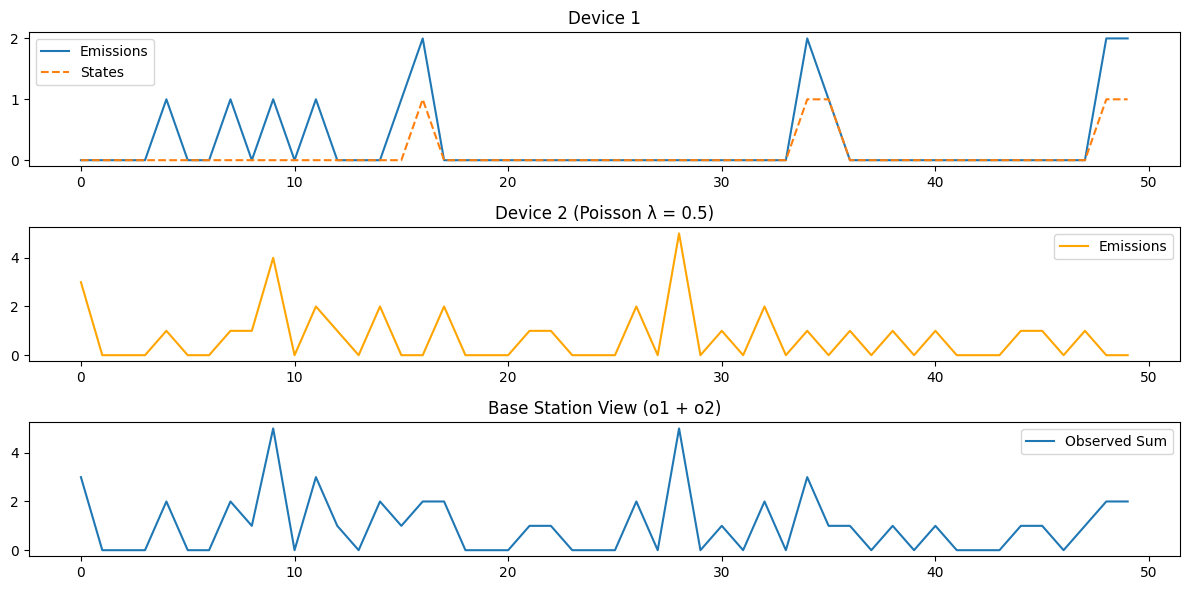

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Device 1")
plt.plot(o1, label='Emissions')
plt.plot(s1, '--', label='States')
plt.legend()

plt.subplot(3, 1, 2)
plt.title("Device 2 (Poisson λ = 0.5)")
plt.plot(o2, 'orange', label='Emissions')
plt.legend()

plt.subplot(3, 1, 3)
plt.title("Base Station View (o1 + o2)")
plt.plot(combined_obs, label='Observed Sum')
plt.legend()

plt.tight_layout()
plt.show()